In [3]:
!python3 --version

Python 3.10.12


In [4]:
! pip show tensorflow

In [5]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.8/644.8 MB 6.2 MB/s eta 0:00:00m eta 0:00:010:00:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 6.4 MB/s eta 0:00:006.7 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 6.5 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 6.4 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 6.3 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 6.3 MB/s eta 0:00:006.5 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 6.0 MB/s eta 0:00:006.8 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 6.5 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 6.4 MB/s eta 0:00:006.7 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 

In [6]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, GlobalAveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

2025-06-08 17:07:24.397530: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749382644.414197   12041 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749382644.418874   12041 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749382644.431566   12041 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749382644.431587   12041 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749382644.431589   12041 computation_placer.cc:177] computation placer alr

In [7]:
strategy = tf.distribute.MirroredStrategy()

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


2025-06-08 17:11:29.092054: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [8]:
tf.__version__

'2.19.0'

In [9]:
nvidia-smi

NameError: name 'nvidia' is not defined

In [11]:
data = pd.read_csv('Shakespeare_data.csv')

In [12]:
data.head()

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,1,Henry IV,NaN,NaN,NaN,ACT I
1,2,Henry IV,NaN,NaN,NaN,SCENE I. London. The palace.
2,3,Henry IV,NaN,NaN,NaN,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"


In [13]:
dataset = data['PlayerLine']

In [14]:
dataset[:10]

0                                                ACT I
1                         SCENE I. London. The palace.
2    Enter KING HENRY, LORD JOHN OF LANCASTER, the ...
3               So shaken as we are, so wan with care,
4           Find we a time for frighted peace to pant,
5       And breathe short-winded accents of new broils
6              To be commenced in strands afar remote.
7            No more the thirsty entrance of this soil
8    Shall daub her lips with her own children's bl...
9     Nor more shall trenching war channel her fields,
Name: PlayerLine, dtype: object

In [15]:
corpus = []
with strategy.scope():
    for line in dataset:
        lowercase_line = line.lower()
        corpus.append(lowercase_line)

In [16]:
corpus[:10]

['act i',
 'scene i. london. the palace.',
 'enter king henry, lord john of lancaster, the earl of westmoreland, sir walter blunt, and others',
 'so shaken as we are, so wan with care,',
 'find we a time for frighted peace to pant,',
 'and breathe short-winded accents of new broils',
 'to be commenced in strands afar remote.',
 'no more the thirsty entrance of this soil',
 "shall daub her lips with her own children's blood,",
 'nor more shall trenching war channel her fields,']

In [17]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

In [18]:
word_to_token = tokenizer.word_index

In [19]:
def key_pair(num):    
    count=0
    for key, value in word_to_token.items():
        if count>=num: break
        print(f''''{key:}': {value},''')
        count +=1
key_pair(10)

'the': 1,
'and': 2,
'i': 3,
'to': 4,
'of': 5,
'a': 6,
'you': 7,
'my': 8,
'in': 9,
'that': 10,


In [20]:
total_words = len(word_to_token)+1
print(total_words)

25576


In [21]:
input_sequences = []
with strategy.scope():
    for line in corpus:
        token_list = tokenizer.texts_to_sequences([line])[0]
        for i in range(1, len(token_list)):
            n_gram_sequence = token_list[:i+1]
            input_sequences.append(n_gram_sequence)

In [22]:
len(input_sequences)

709820

In [23]:
input_sequences[:5]

[[315, 3], [135, 3], [135, 3, 802], [135, 3, 802, 1], [135, 3, 802, 1, 571]]

In [24]:
before = input_sequences[1]

In [25]:
max_seq_len = max(len(x) for x in input_sequences)
print(max_seq_len)

167


In [26]:
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_seq_len, padding = 'pre'))

In [27]:
after = input_sequences[1]

In [28]:
print(f'Before: {before}')
print(f'After: {after}')

Before: [135, 3]
After: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0 135   3]


In [29]:
features, labels = input_sequences[:, :-1], input_sequences[:, -1]

In [32]:
labels = np.array(labels, dtype=np.int32)

In [34]:
with strategy.scope():
    n = 0.05 # We are only taking a chunk of this huge dataset to fit it on the RAM
    slice_size = int(len(features)*n)
    np.save('working/features', features[:slice_size, :])
    np.save('working/labels', labels[:slice_size])

In [36]:
with strategy.scope():
    features = np.load('working/features.npy')
    labels = np.load('working/labels.npy')

In [38]:
some_length = max_seq_len-1
print(some_length)

166


In [40]:
labels.shape

(35491,)

In [42]:
#Create the model!
def generator_model():
    tf.random.set_seed(42)
    model = Sequential()
    model.add(Embedding(total_words, 100, input_length = max_seq_len-1)),
    model.add(Bidirectional(LSTM(64, return_sequences = True))),
    model.add(Bidirectional(LSTM(32))),
    model.add(Dense(64, activation = 'relu')),
    model.add(Dense(total_words, activation = 'softmax'))
    return model

In [45]:
with strategy.scope():
    model = generator_model()
    model.compile(loss = 'sparse_categorical_crossentropy', 
                 optimizer = tf.keras.optimizers.Adam(learning_rate = 0.002),
                 metrics = ['accuracy'])

In [46]:
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [47]:
EPOCHS = 10
history = model.fit(features, labels, epochs = EPOCHS)

2025-06-08 17:59:20.965610: W tensorflow/core/framework/dataset.cc:993] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


Epoch 1/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - accuracy: 0.0321 - loss: 7.4946

2025-06-08 18:02:44.707342: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node MultiDeviceIteratorGetNextFromShard}}]]
2025-06-08 18:02:44.903123: W tensorflow/core/framework/dataset.cc:993] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


1110/1110 ━━━━━━━━━━━━━━━━━━━━ 203s 181ms/step - accuracy: 0.0321 - loss: 7.4942
Epoch 2/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.0502 - loss: 6.3268

2025-06-08 18:06:04.778046: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node MultiDeviceIteratorGetNextFromShard}}]]
2025-06-08 18:06:04.976193: W tensorflow/core/framework/dataset.cc:993] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


1110/1110 ━━━━━━━━━━━━━━━━━━━━ 200s 180ms/step - accuracy: 0.0502 - loss: 6.3268
Epoch 3/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 188s 170ms/step - accuracy: 0.0577 - loss: 6.1137
Epoch 4/10


2025-06-08 18:09:13.375141: W tensorflow/core/framework/dataset.cc:993] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


1110/1110 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.0690 - loss: 5.9322

2025-06-08 18:12:22.087316: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node MultiDeviceIteratorGetNextFromShard}}]]
2025-06-08 18:12:22.283411: W tensorflow/core/framework/dataset.cc:993] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


1110/1110 ━━━━━━━━━━━━━━━━━━━━ 189s 170ms/step - accuracy: 0.0690 - loss: 5.9322
Epoch 5/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 189s 171ms/step - accuracy: 0.0750 - loss: 5.7688
Epoch 6/10


2025-06-08 18:15:31.661722: W tensorflow/core/framework/dataset.cc:993] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


1110/1110 ━━━━━━━━━━━━━━━━━━━━ 190s 171ms/step - accuracy: 0.0806 - loss: 5.6584
Epoch 7/10


2025-06-08 18:18:41.174677: W tensorflow/core/framework/dataset.cc:993] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


1110/1110 ━━━━━━━━━━━━━━━━━━━━ 190s 171ms/step - accuracy: 0.0880 - loss: 5.5156
Epoch 8/10


2025-06-08 18:21:50.688225: W tensorflow/core/framework/dataset.cc:993] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


1110/1110 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.0913 - loss: 5.3964

2025-06-08 18:24:59.925344: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node MultiDeviceIteratorGetNextFromShard}}]]
2025-06-08 18:25:00.117570: W tensorflow/core/framework/dataset.cc:993] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


1110/1110 ━━━━━━━━━━━━━━━━━━━━ 189s 171ms/step - accuracy: 0.0913 - loss: 5.3964
Epoch 9/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 190s 171ms/step - accuracy: 0.0947 - loss: 5.3209
Epoch 10/10


2025-06-08 18:28:09.919992: W tensorflow/core/framework/dataset.cc:993] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


1110/1110 ━━━━━━━━━━━━━━━━━━━━ 206s 186ms/step - accuracy: 0.0985 - loss: 5.2385


2025-06-08 18:31:36.425816: W tensorflow/core/framework/dataset.cc:993] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


In [48]:
#Helper function
def plot_graph(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

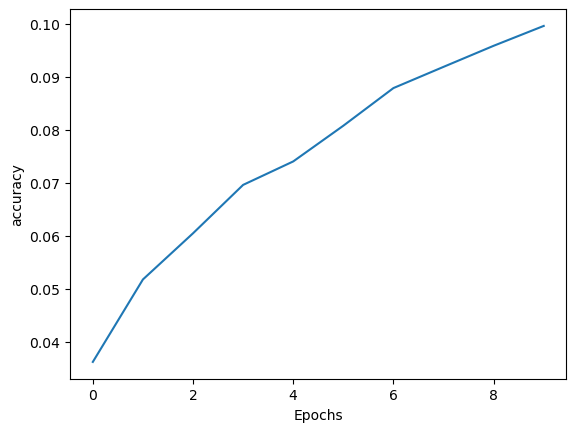

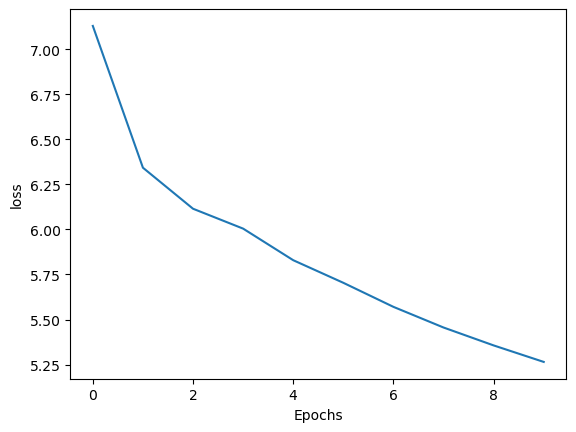

In [49]:
plot_graph(history, 'accuracy')
plot_graph(history, 'loss')

In [50]:
model.save('working/test_generator.h5')

In [51]:
def test_generator(string, num):
    if len(string)==0:
        print("Error: No word found")
        return
    for _ in range(num):
        token_list = tokenizer.texts_to_sequences([string])[0]
        token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding = "pre")
        probabilities = model.predict(token_list)
        choice = np.random.choice([1,2,3])
        predicted = np.argsort(probabilities, axis = -1)[0][-choice]
        if predicted !=0:
            generated_word = tokenizer.index_word[predicted]
            string += " " + generated_word
    print(string)

In [54]:
test_generator("My salute to the king", 20)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step

2025-06-08 18:34:09.956284: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node MultiDeviceIteratorGetNextFromShard}}]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
My salute to the king and have have be i have i am a man is i will be have have be be be be
